### Investigation of Rounding Errors

Consider the function $f(x)=x^3$ and its derivative $f'(x)=3x^2$.  We will investigate the accuracy of the forward difference approximation to the derivative of $f(x)$ for different values of $h$.

The forward difference approximation to the derivative is given by

$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

The exact derivative is given by

$$f'(x) = 3x^2$$

The error in the approximation is given by

$$\epsilon = \left| \frac{f(x+h)-f(x)}{h} - 3x^2 \right|$$

We will investigate the error for different values of $h$.  We will also investigate the error for different precisions of floating point arithmetic.

For simplicity, we will assume that $x=1$.


#### Case 1:  Single Precision floating point + forward difference approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 20  # number of points to investigate

# create arrays to store values - specify data type to be single precision floating point

h = np.zeros(n,dtype=np.float32)
fx = np.zeros(n,dtype=np.float32)
fx_plus_h = np.zeros(n,dtype=np.float32)
fprime_exact = np.zeros(n,dtype=np.float32)
fprime_fd = np.zeros(n,dtype=np.float32)

eps_fd = np.zeros(n,dtype=np.float32)

xval = 1.0

In [2]:
for i in range(0,n):

    hpower=i-n
    h[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx[i]=xval*xval*xval
    fx_plus_h[i]=(xval+h[i])*(xval+h[i])*(xval+h[i]);

    fprime_fd[i]=(fx_plus_h[i]-fx[i])/(h[i]);

    eps_fd[i]=np.abs(fprime_exact[i]-fprime_fd[i]);

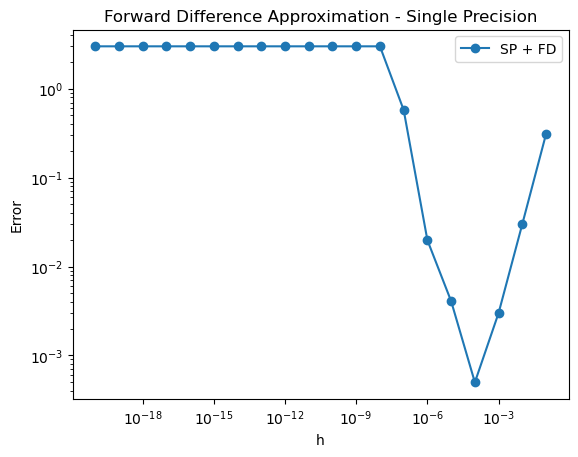

In [3]:
plt.plot(h,eps_fd,'o-',label='SP + FD')
plt.xscale("log")
plt.yscale("log")
plt.title("Forward Difference Approximation - Single Precision")
plt.xlabel("h")
plt.ylabel("Error")
plt.legend()

#### Case 2:  Double Precision floating point + forward difference approximation

In [4]:
h = np.zeros(n)
fx = np.zeros(n)
fx_plus_h = np.zeros(n)
fprime_exact = np.zeros(n)
fprime_fd_double = np.zeros(n)

eps_fd_double = np.zeros(n)


In [5]:
for i in range(0,n):

    hpower=i-n
    h[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx[i]=xval*xval*xval
    fx_plus_h[i]=(xval+h[i])*(xval+h[i])*(xval+h[i]);

    fprime_fd_double[i]=(fx_plus_h[i]-fx[i])/(h[i]);

    eps_fd_double[i]=np.abs(fprime_exact[i]-fprime_fd_double[i]);

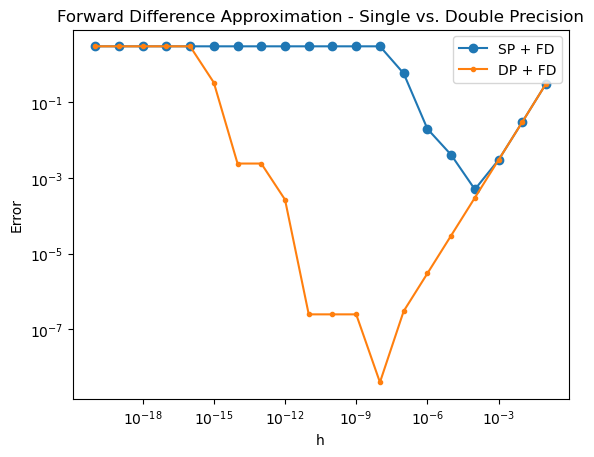

In [6]:
plt.plot(h,eps_fd,'o-',label='SP + FD')
plt.plot(h,eps_fd_double,'.-',label='DP + FD')
plt.xscale("log")
plt.yscale("log")
plt.title("Forward Difference Approximation - Single vs. Double Precision")
plt.xlabel("h")
plt.ylabel("Error")
plt.legend()

#### Case 3:  Single Precision floating point + centered difference approximation

The centered difference approximation to the derivative is given by

$$f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$$

In [7]:
h = np.zeros(n,dtype=np.float32)
fx_plus_h = np.zeros(n,dtype=np.float32)
fx_minus_h = np.zeros(n,dtype=np.float32)
fprime_exact = np.zeros(n,dtype=np.float32)
fprime_cd = np.zeros(n,dtype=np.float32)

eps_cd = np.zeros(n,dtype=np.float32)


In [8]:
for i in range(0,n):

    hpower=i-n
    h[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx_minus_h[i]=(xval-h[i])*(xval-h[i])*(xval-h[i])
    fx_plus_h[i]=(xval+h[i])*(xval+h[i])*(xval+h[i])

    fprime_cd[i]=(fx_plus_h[i]-fx_minus_h[i])/(2.0*h[i]);

    eps_cd[i]=np.abs(fprime_exact[i]-fprime_cd[i]);

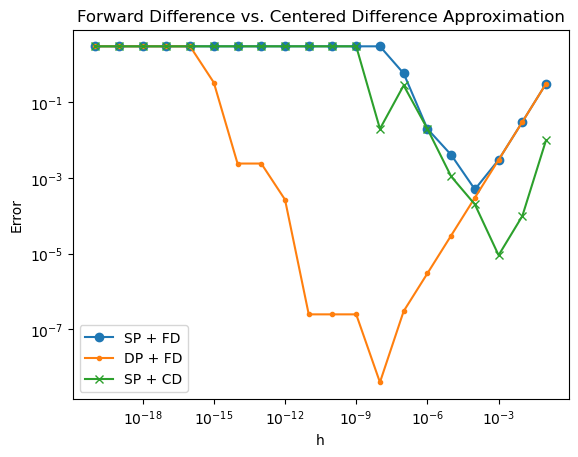

In [9]:
plt.plot(h,eps_fd,'o-',label='SP + FD')
plt.plot(h,eps_fd_double,'.-',label='DP + FD')
plt.plot(h,eps_cd,'x-',label='SP + CD')
plt.xscale("log")
plt.yscale("log")
plt.title("Forward Difference vs. Centered Difference Approximation")
plt.xlabel("h")
plt.ylabel("Error")
plt.legend()

#### Case 4:  Double Precision floating point + centered difference approximation

In [10]:
h = np.zeros(n)
fx_plus_h = np.zeros(n)
fx_minus_h = np.zeros(n)
fprime_exact = np.zeros(n)
fprime_cd_double = np.zeros(n)

eps_cd_double = np.zeros(n)


In [11]:
for i in range(0,n):

    hpower=i-n
    h[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx_minus_h[i]=(xval-h[i])*(xval-h[i])*(xval-h[i])
    fx_plus_h[i]=(xval+h[i])*(xval+h[i])*(xval+h[i])

    fprime_cd_double[i]=(fx_plus_h[i]-fx_minus_h[i])/(2.0*h[i]);

    eps_cd_double[i]=np.abs(fprime_exact[i]-fprime_cd_double[i]);

Text(0, 0.5, 'Error')

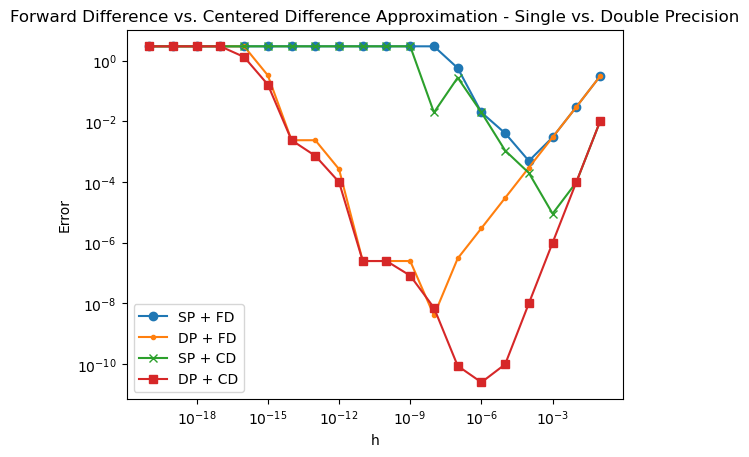

In [12]:
plt.plot(h,eps_fd,'o-',label='SP + FD') # single precision, forward difference
plt.plot(h,eps_fd_double,'.-',label='DP + FD') # double precision, forward difference
plt.plot(h,eps_cd,'x-',label='SP + CD') # single precision, centered difference
plt.plot(h,eps_cd_double,'s-',label='DP + CD') # double precision, centered difference
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title("Forward Difference vs. Centered Difference Approximation - Single vs. Double Precision")
plt.xlabel("h")
plt.ylabel("Error")

#### Conclusion

The forward difference approximation to the derivative is first order accurate.

The centered difference approximation to the derivative is second order accurate.

The error in the approximation is proportional to $h$ for the forward difference approximation and proportional to $h^2$ for the centered difference approximation.

The error in the approximation is inversely proportional to the precision of the floating point arithmetic. That is, the error in the approximation is smaller for double precision than for single precision.

### Use double precision!!! It is more accurate and not much slower than single precision. It is the default in Python, but in other languages one must specify that double precision is desired.

### The algorithm used to evaluate the derivative is important.  The centered difference approximation is more accurate than the forward difference approximation.





#### Case 5:  Investigation of the function y=x$^3$

Another interesting question that we can ask is: does it matter where we evaluate the derivative?  For example, does it matter if we evaluate the derivative at $x=0$ or, as we did above, at $x=1$?  We can investigate this question by plotting the error in the derivative as a function of $x$.

We begin by evaluating the derivative, and the function, over a range of $x$, for a large numer of points.  We choose non-"nice" values of the end-points and the number of points to avoid any special cases (like $x=0$, exactly).

We will evaluate the derivative using both the forward difference, backward difference, and centered difference approximations.

The forward difference approximation to the derivative is given by

$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

The backward difference approximation to the derivative is given by

$$f'(x) \approx \frac{f(x)-f(x-h)}{h}$$

The centered difference approximation to the derivative is given by

$$f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$$

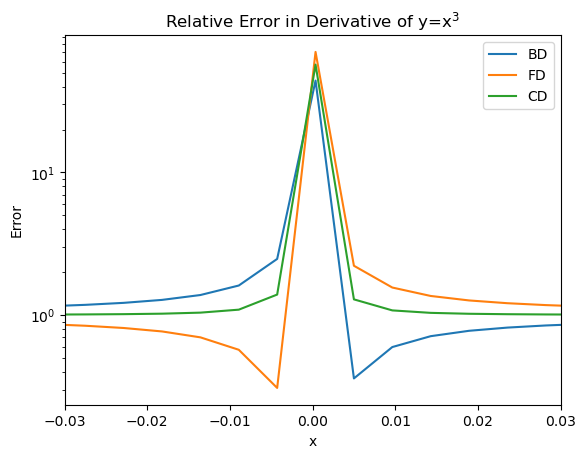

In [13]:
npts = 1511
xlow = -3.5
xhigh = 3.51
x = np.linspace(xlow,xhigh,npts)
y = x**3
yp = 3.0*x**2

#plt.plot(x,y)
#plt.plot(x,yp/yp)

dx = (xhigh-xlow)/(npts-1)

yp_backward = np.zeros(npts)
yp_backward[0] = 3.0*x[0]**2

for i in range(1,npts):
    yp_backward[i] = (y[i]-y[i-1])/dx
    
yp_forward = np.zeros(npts)
yp_forward[npts-1] = 3.0*x[npts-1]**2

for i in range(0,npts-1):
    yp_forward[i] = (y[i+1]-y[i])/dx

yp_center = np.zeros(npts)
yp_center[0] = 3.0*x[0]**2
yp_center[npts-1] = 3.0*x[npts-1]**2

for i in range(1,npts-1):
    yp_center[i] = (y[i+1]-y[i-1])/(2.0*dx)

plt.plot(x,np.abs(yp_backward/yp),label="BD")
plt.plot(x,np.abs(yp_forward/yp),label="FD")
plt.plot(x,np.abs(yp_center/yp),label="CD")
plt.yscale("log")
plt.xlim(-.03,.03)
plt.title("Relative Error in Derivative of y=x$^3$")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()